<a href="https://colab.research.google.com/github/NightmareFoxZ/projekdicoding/blob/main/AnalisisPenjualaanSepeda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Proyek Analisis Data


*   Nama: ABHAR ARZAQI MUHAMMAD
*   Email: abhararzaqimuhammad@gmail.com
*   Dataset : Bike Sharing Dataset

# Menentukan Pertanyaan Bisnis
*   Waktu apa saja penyewaan sepeda dalam keadaan paling laku dan paling sepi?
*   Bagaimana perbandingan jumlah antara penyewaan sepeda antara hari libur, akhir pekan dan hari libur?
*   Cuaca apa saja yang paling diminati oleh pengguna untuk bersepeda?
*   Apakah hubungan antara cuaca dan hari tertentu akan berpengaruh pada jumlah penyewaan sepeda? Bagaimana hubungannya?

## Import Semua Packages/Library yang Digunakan

In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

In [39]:
data_hari = pd.read_csv('/content/drive/MyDrive/dicodin/day.csv')
data_hari

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,727,2012-12-27,1,1,12,0,4,1,2,0.254167,0.226642,0.652917,0.350133,247,1867,2114
727,728,2012-12-28,1,1,12,0,5,1,2,0.253333,0.255046,0.590000,0.155471,644,2451,3095
728,729,2012-12-29,1,1,12,0,6,0,2,0.253333,0.242400,0.752917,0.124383,159,1182,1341
729,730,2012-12-30,1,1,12,0,0,0,1,0.255833,0.231700,0.483333,0.350754,364,1432,1796


In [40]:
data_jam = pd.read_csv('/content/drive/MyDrive/dicodin/hour.csv')
data_jam

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,1/1/2011,1,0,1,0,0,6,0,1,0.24,0.29,0.81,0.00,3.0,13.0,16.0
1,2,1/1/2011,1,0,1,1,0,6,0,1,0.22,0.27,0.80,0.00,8.0,32.0,40.0
2,3,1/1/2011,1,0,1,2,0,6,0,1,0.22,0.27,0.80,0.00,5.0,27.0,32.0
3,4,1/1/2011,1,0,1,3,0,6,0,1,0.24,0.29,0.75,0.00,3.0,10.0,13.0
4,5,1/1/2011,1,0,1,4,0,6,0,1,0.24,0.29,0.75,0.00,0.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,17375,12/31/2012,1,1,12,19,0,1,1,2,0.26,0.26,0.60,0.16,11.0,108.0,119.0
17375,17376,12/31/2012,1,1,12,20,0,1,1,2,0.26,0.26,0.60,0.16,8.0,81.0,89.0
17376,17377,12/31/2012,1,1,12,21,0,1,1,1,0.26,0.26,0.60,0.16,7.0,83.0,90.0
17377,17378,12/31/2012,1,1,12,22,0,1,1,1,0.26,0.27,0.56,0.13,13.0,48.0,61.0


In [41]:
# Uabh data float menjadi integer
if 'cnt' in data_hari.columns and pd.api.types.is_numeric_dtype(data_hari['cnt']):
    data_hari['cnt'] = data_hari['cnt'].astype(int)
else:
    print("Warning: 'cnt' column not found or not numeric in data_hari.")

if 'cnt' in data_jam.columns and pd.api.types.is_numeric_dtype(data_jam['cnt']):
    data_jam['cnt'] = data_jam['cnt'].astype(int)
else:
    print("Warning: 'cnt' column not found or not numeric in data_jam.")

# Mssing value
missing_values_hari = data_hari.isnull().sum()
print("Missing values in data_hari:\n", missing_values_hari)

missing_values_jam = data_jam.isnull().sum()
print("\nMissing values in data_jam:\n", missing_values_jam)

Missing values in data_hari:
 instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

Missing values in data_jam:
 instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64


Mengecek missing value serta mengubah tipe data dari float menjadi integer

## Exploratory Data Analysis (EDA)

In [42]:
# Sort the DataFrame by 'cnt' in descending order and get the top 5
top_5_jam = data_jam.groupby(['dteday', 'hr'])['cnt'].sum()
top_5_jam_ranked = top_5_jam.sort_values(ascending=False).head(10)
top_5_jam_ranked

,,cnt
dteday,hr,
9/12/2012,18,977
9/20/2012,17,976
9/11/2012,17,970
9/10/2012,18,968
9/25/2012,17,967
10/24/2012,17,963
3/23/2012,17,957
9/26/2012,17,953
10/10/2012,17,948


Insight yang dapat diperoleh dari 10 data teratas adalah penyewaan sepeda paling laku adalah pada jam 17-18 atau jam 5 hingga 6 sore

In [43]:
# Sort the DataFrame by 'cnt' in descending order and get the top 10
top_5_jam = data_jam.groupby(['dteday', 'hr'])['cnt'].sum()
top_5_jam_ranked = top_5_jam.sort_values(ascending=False).tail(10)
top_5_jam_ranked

dteday     hr
3/7/2011   4     1
           5     1
1/21/2011  4     1
           3     1
3/8/2011   2     1
1/9/2011   4     1
           5     1
           6     1
1/20/2011  4     1
2/2/2012   4     1
Name: cnt, dtype: int64

Insight yang dapat diperoleh dari 10 data terbawah diatas adalah pada pagi hari, jam 2 hingga jam 6 pagi adalah jam-jam dimana orang jarang menyewa sepeda

In [44]:
# Sort the DataFrame by 'cnt' in ascending order and get the top 5
top_5_hari = data_hari.groupby(['dteday'])['cnt'].sum()
top_5_hari_ranked = top_5_hari.sort_values(ascending=False).head(5)
top_5_hari_ranked

,cnt
dteday,
2012-09-15,8714
2012-09-29,8555
2012-09-22,8395
2012-03-23,8362
2012-05-19,8294


In [45]:
# Sort the DataFrame by 'cnt' in ascending order and get the top 5
top_5_hari = data_hari.groupby(['dteday'])['cnt'].sum()
top_5_hari_ranked = top_5_hari.sort_values(ascending=False).tail(5)
top_5_hari_ranked

,cnt
dteday,
2011-03-06,605
2011-01-26,506
2012-12-26,441
2011-01-27,431
2012-10-29,22


In [46]:
# Menganalisis jumlah penyewa pada tiap cuaca menggunakan kolom 'weathersit'
def categorize_weather(row):
    if row['weathersit'] == 1:
        return 'Cerah'
    elif row['weathersit'] == 2:
        return 'Mendung / Berkabut'
    elif row['weathersit'] == 3:
        return 'Gerimis / Hujan Salju'
    else:
        return 'Hujan Deras / Badai / Badai Salju'

data_jam['weather_category'] = data_jam.apply(categorize_weather, axis=1)

weather_cnt = data_jam.groupby(['weather_category'])['cnt'].sum()

weather_cnt_ranked = weather_cnt.sort_values(ascending=False)

weather_cnt_ranked

,cnt
weather_category,
Cerah,2338173
Mendung / Berkabut,795952
Gerimis / Hujan Salju,158331
Hujan Deras / Badai / Badai Salju,223


Berdasarkan cuaca, tingkat penyewaan sepeda paling sering ada pada cuaca cerah

In [47]:
# Menganalisis jumlah penyewa pada hari hari tertentu menggunakan kolom 'holiday dan workingday'
def categorize_day(row):
    if row['holiday'] == 0 and row['workingday'] == 1:
        return 'hari kerja'
    elif row['holiday'] == 1 and row['workingday'] == 0:
        return 'hari libur'
    else:
        return 'akhir pekan'

data_jam['day_category'] = data_jam.apply(categorize_day, axis=1)

holiday_workingday_cnt = data_jam.groupby(['day_category'])['cnt'].sum()

holiday_workingday_cnt_ranked = holiday_workingday_cnt.sort_values(ascending=False)

holiday_workingday_cnt_ranked

,cnt
day_category,
hari kerja,2292410
akhir pekan,921834
hari libur,78435


In [53]:
# Menggabungkan antara kolom cuaca dan hari
combined_cnt = data_jam.groupby(['day_category', 'weather_category'])['cnt'].sum().reset_index()

combined_cnt_ranked = combined_cnt.sort_values(by=['cnt'], ascending=False)

combined_cnt_ranked

combined_cnt_ranked = combined_cnt_ranked.reset_index()
combined_cnt_ranked = combined_cnt_ranked.rename(columns={'index': 'ranking'})

# Membuat kplom baru bernama new numnber agar bisa dirankingkan dengan leluasa
combined_cnt_ranked['new_number'] = range(1, len(combined_cnt_ranked) + 1)

# Mengubah nama new number menjadi ranking
combined_cnt_ranked = combined_cnt_ranked.drop('ranking', axis=1)
combined_cnt_ranked = combined_cnt_ranked.rename(columns={'new_number': 'ranking'})
combined_cnt_ranked = combined_cnt_ranked.set_index('ranking')

combined_cnt_ranked

,day_category,weather_category,cnt
ranking,,,
1,hari kerja,Cerah,1590954
2,akhir pekan,Cerah,691274
3,hari kerja,Mendung / Berkabut,583970
4,akhir pekan,Mendung / Berkabut,191570
5,hari kerja,Gerimis / Hujan Salju,117286
6,hari libur,Cerah,55945
7,akhir pekan,Gerimis / Hujan Salju,38967
8,hari libur,Mendung / Berkabut,20412
9,hari libur,Gerimis / Hujan Salju,2078


## Visualization & Explanatory Analysis

<ipython-input-49-6fd6cef5f75d>:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='weather_category', y='cnt', data=data_jam, estimator=sum, ci=None, palette="viridis") # estimator=sum and ci=None to show the actual sum
<ipython-input-49-6fd6cef5f75d>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='weather_category', y='cnt', data=data_jam, estimator=sum, ci=None, palette="viridis") # estimator=sum and ci=None to show the actual sum


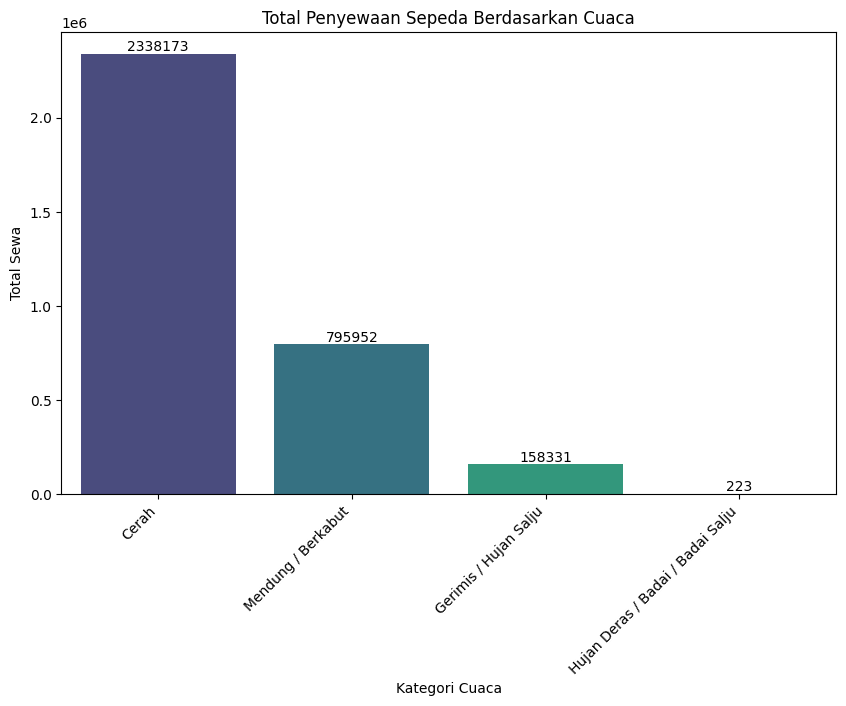

In [49]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.barplot(x='weather_category', y='cnt', data=data_jam, estimator=sum, ci=None, palette="viridis") # estimator=sum and ci=None to show the actual sum
plt.title('Total Penyewaan Sepeda Berdasarkan Cuaca')
plt.xlabel('Kategori Cuaca')
plt.ylabel('Total Sewa')
plt.xticks(rotation=45, ha='right')

# Add value labels on top of each bar
for p in plt.gca().patches:
    plt.gca().annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                   ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                   textcoords='offset points')
plt.show()

<ipython-input-50-97a683aeb959>:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='day_category', y='cnt', data=data_jam, estimator=sum, ci=None, palette="magma") # estimator=sum and ci=None to show the actual sum
<ipython-input-50-97a683aeb959>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='day_category', y='cnt', data=data_jam, estimator=sum, ci=None, palette="magma") # estimator=sum and ci=None to show the actual sum


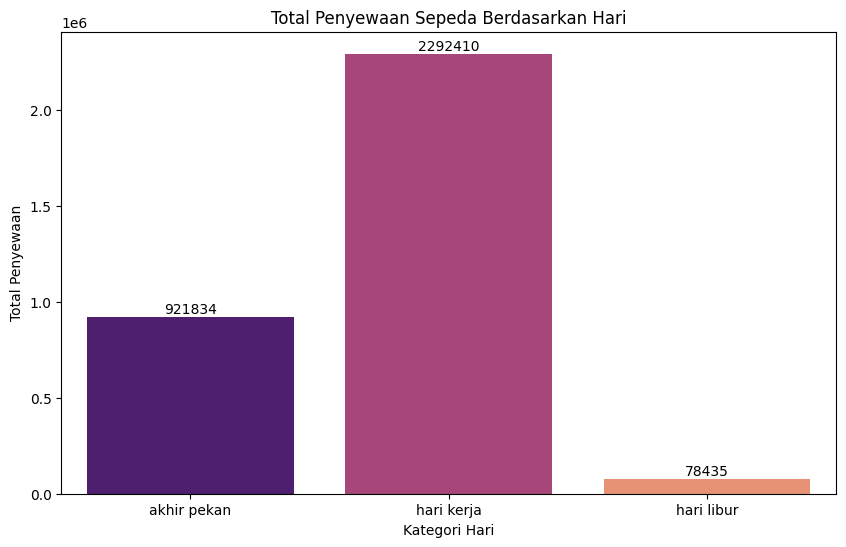

In [50]:
plt.figure(figsize=(10, 6))
sns.barplot(x='day_category', y='cnt', data=data_jam, estimator=sum, ci=None, palette="magma") # estimator=sum and ci=None to show the actual sum
plt.title('Total Penyewaan Sepeda Berdasarkan Hari')
plt.xlabel('Kategori Hari')
plt.ylabel('Total Penyewaan')

# Add value labels on top of each bar
for p in plt.gca().patches:
    plt.gca().annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                   ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                   textcoords='offset points')

plt.show()

<ipython-input-51-5bf2969da4a2>:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='day_category', y='cnt', hue='weather_category', data=data_jam, estimator=sum, ci=None, palette="plasma") # estimator=sum and ci=None to show the actual sum


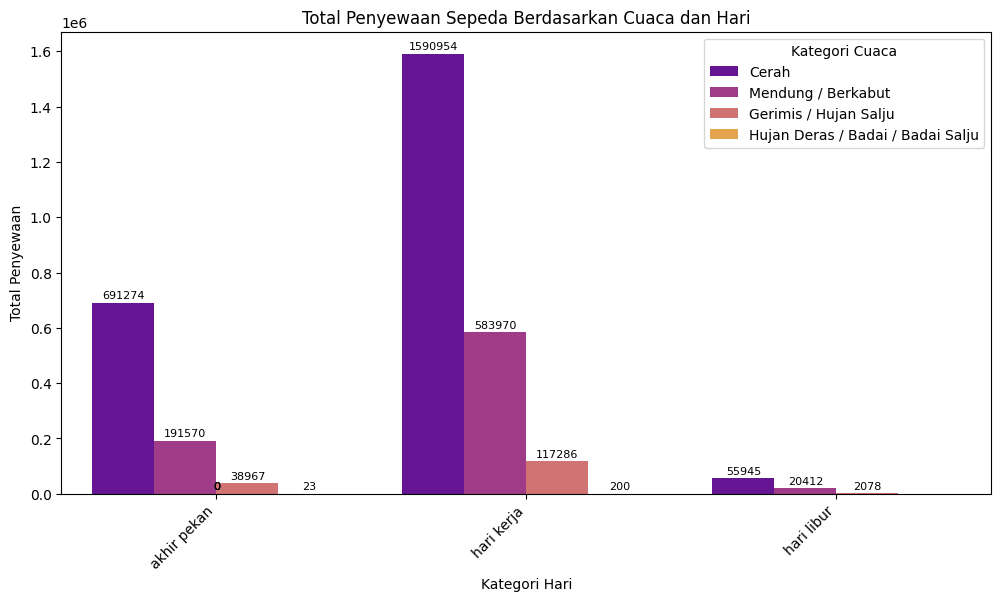

In [51]:
plt.figure(figsize=(12, 6))
sns.barplot(x='day_category', y='cnt', hue='weather_category', data=data_jam, estimator=sum, ci=None, palette="plasma") # estimator=sum and ci=None to show the actual sum
plt.title('Total Penyewaan Sepeda Berdasarkan Cuaca dan Hari')
plt.xlabel('Kategori Hari')
plt.ylabel('Total Penyewaan')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Kategori Cuaca')

# Add value labels on top of each bar
for p in plt.gca().patches:
    plt.gca().annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                   ha='center', va='center', fontsize=8, color='black', xytext=(0, 5),
                   textcoords='offset points')

plt.show()